In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sc
import math

plots_dir = 'W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\plots\\' # directory for output plots

In [83]:
####################################
#### load in all the gene lists ####
####################################
core_44_FUNCTION = pd.read_excel('W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\data\\DE_clusters_for_circos\\GSEA_core_MED_target_genes\\44_more_than_3\\MB-18-56_44_coreMED_targets_GOFUNCTION.xlsx')
core_44_PROCESS = pd.read_excel('W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\data\\DE_clusters_for_circos\\GSEA_core_MED_target_genes\\44_more_than_3\\MB-18-56_44_coreMED_targets_GOPROCESS.xlsx')

core_187_FUNCTION = pd.read_excel('W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\data\\DE_clusters_for_circos\\GSEA_core_MED_target_genes\\187_more_than_2\\MB-18-56_187_coreMED_targets_GOFUNCTION.xlsx')
core_187_PROCESS = pd.read_excel('W:\\lab_winter\\private\\Experiments\\Matthias_MB\\2018\\MB18_56 QuantSeq merge analysis\\data\\DE_clusters_for_circos\\GSEA_core_MED_target_genes\\187_more_than_2\\MB-18-56_187_coreMED_targets_GOPROCESS.xlsx')


In [84]:
#####################################
#### filter & convert log10(FDR) ####
#####################################
core_187_FUNCTION = core_187_FUNCTION[(core_187_FUNCTION.B > 500) & (core_187_FUNCTION.B < 2000) & (core_187_FUNCTION['FDR q-value'] < 0.05)]
core_187_PROCESS = core_187_PROCESS[(core_187_PROCESS.B > 500) & (core_187_PROCESS['FDR q-value'] < 0.05)]
core_44_FUNCTION = core_44_FUNCTION[(core_44_FUNCTION.B > B_limit) & (core_44_FUNCTION['FDR q-value'] < 0.5)]
core_44_PROCESS = core_44_PROCESS[(core_44_PROCESS.B > B_limit) & (core_44_PROCESS['FDR q-value'] < 0.5)]

core_187_FUNCTION = core_187_FUNCTION.sort_values(by='Enrichment', ascending=False)
core_187_PROCESS = core_187_PROCESS.sort_values(by='Enrichment', ascending=False)
core_44_FUNCTION = core_44_FUNCTION.sort_values(by='Enrichment', ascending=False)
core_44_PROCESS = core_44_PROCESS.sort_values(by='Enrichment', ascending=False)

core_187_FUNCTION['FDR q-value'] = -1 * np.log10(core_187_FUNCTION['FDR q-value'])
core_187_PROCESS['FDR q-value'] = -1 * np.log10(core_187_PROCESS['FDR q-value'])
core_44_FUNCTION['FDR q-value'] = -1 * np.log10(core_44_FUNCTION['FDR q-value'])
core_44_PROCESS['FDR q-value'] = -1 * np.log10(core_44_PROCESS['FDR q-value'])

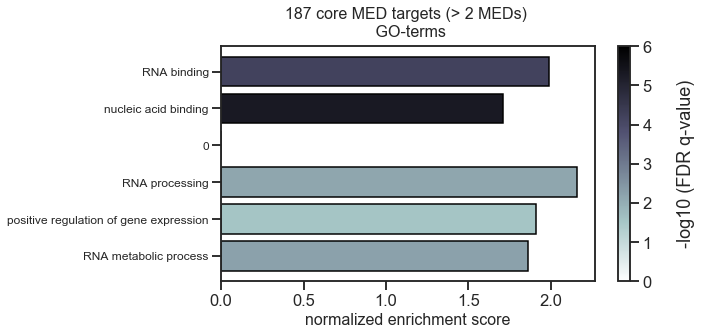

In [102]:
# stitch together the individual dataframes
spacer_df = pd.DataFrame(0,index = ['SPACE1','SPACE2','SPACE3'], columns = core_187_FUNCTION.columns)
plot_df = core_187_FUNCTION.append(spacer_df.iloc[:1,:])
plot_df = plot_df.append(core_187_PROCESS)

# set colormap maximum to up-rounded logFDR
norm = mpl.colors.Normalize(vmin = 0., vmax = math.ceil(max(plot_df['FDR q-value'])))
plot_df['color'] = list(plt.cm.bone_r(norm(list(plot_df['FDR q-value']))))

##### finally plot
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(10,5))

f = plt.barh(range(len(plot_df)), plot_df['Enrichment'], color = plot_df['color'], edgecolor = ['k' for i in plot_df.index])

plt.yticks(range(len(plot_df)), list(plot_df.Description), fontsize = 12)
plt.gca().invert_yaxis()
plt.xlabel('normalized enrichment score', fontsize = 16)
plt.title('187 core MED targets (> 2 MEDs) \n GO-terms', fontsize = 16, pad=10)

sm = mpl.cm.ScalarMappable(cmap=plt.cm.get_cmap('bone_r'), norm=norm)
sm.set_array([])
plt.colorbar(sm).set_label('-log10 (FDR q-value)', rotation=90, labelpad=25)

plt.tight_layout()

plt.show()
#plt.savefig(plots_dir + 'GSEA_plots\\Quant-seq_187_coreMEDtargets_GOterms_BoneR.pdf', dpi=300)
#plt.savefig(plots_dir + 'GSEA_plots\\Quant-seq_187_coreMEDtargets_GOterms_BoneR.png', dpi=300)

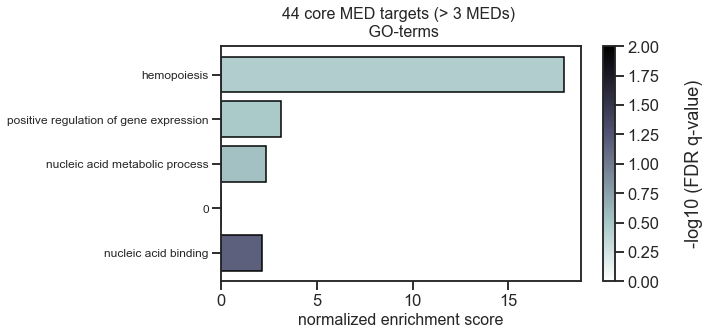

In [101]:
# stitch together the individual dataframes
spacer_df = pd.DataFrame(0,index = ['SPACE1','SPACE2','SPACE3'], columns = core_44_FUNCTION.columns)
plot_df = core_44_PROCESS.append(spacer_df.iloc[:1,:])
plot_df = plot_df.append(core_44_FUNCTION)

# set colormap maximum to up-rounded logFDR
norm = mpl.colors.Normalize(vmin = 0., vmax = math.ceil(max(plot_df['FDR q-value'])))
plot_df['color'] = list(plt.cm.bone_r(norm(list(plot_df['FDR q-value']))))

##### finally plot
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(10,5))

f = plt.barh(range(len(plot_df)), plot_df['Enrichment'], color = plot_df['color'], edgecolor = ['k' for i in plot_df.index])

plt.yticks(range(len(plot_df)), list(plot_df.Description), fontsize = 12)
plt.gca().invert_yaxis()
plt.xlabel('normalized enrichment score', fontsize = 16)
plt.title('44 core MED targets (> 3 MEDs) \n GO-terms', fontsize = 16, pad=10)

sm = mpl.cm.ScalarMappable(cmap=plt.cm.get_cmap('bone_r'), norm=norm)
sm.set_array([])
plt.colorbar(sm).set_label('-log10 (FDR q-value)', rotation=90, labelpad=25)

plt.tight_layout()

plt.show()
#plt.savefig(plots_dir + 'GSEA_plots\\Quant-seq_44_coreMEDtargets_GOterms_BoneR.pdf', dpi=300)
#plt.savefig(plots_dir + 'GSEA_plots\\Quant-seq_44_coreMEDtargets_GOterms_BoneR.png', dpi=300)

,GO Term,Description,P-value,FDR q-value,Enrichment,N,B,n,b,Genes
SPACE1,0,0,0,0,0,0,0,0,0,0
SPACE2,0,0,0,0,0,0,0,0,0,0


In [82]:
core_187_FUNCTION.sort_values(by='Enrichment', ascending=False)

,GO Term,Description,P-value,FDR q-value,Enrichment,N,B,n,b,Genes
1,GO:0003723,RNA binding,4.240000e-08,4.20621,1.99,5273,889,173,58,[DDX31 - dead (asp-glu-ala-asp) box polypept...
0,GO:0003676,nucleic acid binding,1.660000e-09,5.31158,1.71,5273,1582,173,89,[DDX31 - dead (asp-glu-ala-asp) box polypept...


In [58]:
core_187_FUNCTION

,GO Term,Description,P-value,FDR q-value,Enrichment,N,B,n,b,Genes
0,GO:0003676,nucleic acid binding,1.660000e-09,5.31158,1.71,5273,1582,173,89,[DDX31 - dead (asp-glu-ala-asp) box polypept...
1,GO:0003723,RNA binding,4.240000e-08,4.20621,1.99,5273,889,173,58,[DDX31 - dead (asp-glu-ala-asp) box polypept...


In [59]:
core_187_PROCESS

,GO Term,Description,P-value,FDR q-value,Enrichment,N,B,n,b,Genes
4,GO:0016070,RNA metabolic process,0.000002,2.273273,1.86,5273,851,173,52,"[WDR4 - wd repeat domain 4, SNORD14D - sma..."
5,GO:0006396,RNA processing,0.000004,2.177178,2.16,5273,521,173,37,"[WDR4 - wd repeat domain 4, SNORD14D - sma..."
6,GO:0010628,positive regulation of gene expression,0.000017,1.555955,1.91,5273,671,173,42,[PPRC1 - peroxisome proliferator-activated r...


In [60]:
core_44_FUNCTION

,GO Term,Description,P-value,FDR q-value,Enrichment,N,B,n,b,Genes
0,GO:0003676,nucleic acid binding,0.000023,1.179142,2.11,5273,1582,38,24,[RUNX3 - runt-related transcription factor 3...


In [61]:
core_44_PROCESS.loc

,GO Term,Description,P-value,FDR q-value,Enrichment,N,B,n,b,Genes
0,GO:0010628,positive regulation of gene expression,0.000029,0.485452,3.10,5273,671,38,15,[RUNX3 - runt-related transcription factor 3...
1,GO:0030097,hemopoiesis,0.000063,0.452225,17.90,5273,31,38,4,[RUNX3 - runt-related transcription factor 3...
2,GO:0090304,nucleic acid metabolic process,0.000076,0.546682,2.36,5273,1118,38,19,[RUNX3 - runt-related transcription factor 3...
